# Import

In [1]:
# Import các thư viện cần thiết
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math

from scipy.stats.mstats import winsorize
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from IPython.display import display
from pathlib import Path

warnings.filterwarnings('ignore')

pd.set_option('display.float_format', lambda x: '%.4f' % x)
sns.set_style("whitegrid")


# Tải dữ liệu

In [2]:
data_dir = Path('../../data/raw/fa')
if not data_dir.exists():
    print('Không tìm thấy thư mục dữ liệu:', data_dir.resolve())
else:
    csv_files = sorted(data_dir.glob('*.csv'))
    print(f'Tìm thấy {len(csv_files)} file CSV')
    dfs = {}
    for f in csv_files:
        try:
            df = pd.read_csv(f)
            dfs[f.stem] = df
            print(f'Đã tải {f.name}')
        except Exception as e:
            print(f'Không thể tải {f.name}:', e)


Tìm thấy 3 file CSV
Đã tải bangcandoiketoan.csv
Đã tải bangluuchuyentiente.csv
Đã tải baocaotaichinh.csv


# I. Tìm hiểu Dữ liệu

## 1. Mô tả Dữ liệu

In [3]:
print("Cấu trúc tổng quan của dữ liệu:")
for name, df in dfs.items():
	print(f'\nDataFrame: {name}')
	print(f'Shape: {df.shape}')
	df.info()
	display(df.head())


Cấu trúc tổng quan của dữ liệu:

DataFrame: bangcandoiketoan
Shape: (12431, 76)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12431 entries, 0 to 12430
Data columns (total 76 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   CP                                                           12431 non-null  object 
 1   Năm                                                          12431 non-null  int64  
 2   Kỳ                                                           12431 non-null  int64  
 3   TÀI SẢN NGẮN HẠN (đồng)                                      12112 non-null  float64
 4   Tiền và tương đương tiền (đồng)                              12431 non-null  int64  
 5   Giá trị thuần đầu tư ngắn hạn (đồng)                         11283 non-null  float64
 6   Các khoản phải thu ngắn hạn (đồng)                           12112 non-null  float64
 

,CP,Năm,Kỳ,TÀI SẢN NGẮN HẠN (đồng),Tiền và tương đương tiền (đồng),Giá trị thuần đầu tư ngắn hạn (đồng),Các khoản phải thu ngắn hạn (đồng),Hàng tồn kho ròng,Tài sản lưu động khác,TÀI SẢN DÀI HẠN (đồng),...,Vốn của tổ chức tín dụng,Quỹ của tổ chức tín dụng,Chênh lệch tỷ giá hối đoái,Lợi thế thương mại,Vốn Ngân sách nhà nước và quỹ khác,_Các quỹ khác,Cổ đông thiểu số,Đầu tư vào công ty con,Tài sản cố định thuê tài chính,Chênh lệch đánh giá lại tài sản
0,AAA,2025,3,4377037083396.0000,1741373916584,186400000000.0000,1531251902335.0000,757283181389.0000,160728083088.0000,7864700594492.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AAA,2025,2,4553020197155.0000,1706426051965,229407600000.0000,1475454681315.0000,987232373973.0000,154499489902.0000,7606507839458.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AAA,2025,1,4793960251895.0000,2106077190958,166190744500.0000,1551510885796.0000,827536022226.0000,142645408415.0000,7390793127094.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AAA,2024,4,6426369244563.0000,2419517905105,718639358712.0000,1801012289922.0000,1286443372106.0000,200756318718.0000,7341846339892.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AAA,2024,3,6956714508528.0000,1945532019980,1346697394178.0000,2303218872955.0000,1138806271275.0000,222459950140.0000,6075525235098.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



DataFrame: bangluuchuyentiente
Shape: (12327, 47)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12327 entries, 0 to 12326
Data columns (total 47 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Mã CK                                                                12327 non-null  object 
 1   CP                                                                   12327 non-null  object 
 2   Năm                                                                  12327 non-null  int64  
 3   Kỳ                                                                   12327 non-null  int64  
 4   Lãi/Lỗ ròng trước thuế                                               9659 non-null   float64
 5   Khấu hao TSCĐ                                                        10924 non-null  float64
 6   Dự phòng RR tín dụng                               

,Mã CK,CP,Năm,Kỳ,Lãi/Lỗ ròng trước thuế,Khấu hao TSCĐ,Dự phòng RR tín dụng,Lãi/Lỗ chênh lệch tỷ giá chưa thực hiện,Lãi/Lỗ từ thanh lý tài sản cố định,Lãi/Lỗ từ hoạt động đầu tư,...,Ảnh hưởng của chênh lệch tỷ giá,Tiền và tương đương tiền cuối kỳ,Thu lãi và cổ tức,"Chi trả cho việc mua lại, trả cổ phiếu",_Tăng/Giảm các khoản phải thu,_Tăng/Giảm các khoản phải trả,(Lãi)/lỗ các hoạt động khác,Lưu chuyển tiền thuần từ HĐKD trước thuế,Chi từ các quỹ của TCTD,Cố tức đã nhận
0,AAA,AAA,2025,3,156177544852.0000,123479574529.0000,0.0000,21981270333.0000,0.0000,-32056061888.0000,...,-19968078425.0000,1741373916584.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AAA,AAA,2025,2,211000328064.0000,124198168494.0000,-53351295.0000,-28939479859.0000,0.0000,-73102523029.0000,...,29123356683.0000,1706426051965.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AAA,AAA,2025,1,68490244130.0000,131683853040.0000,-1012389278.0000,-822206533.0000,0.0000,83780280365.0000,...,-141596623.0000,2106077190958.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AAA,AAA,2024,4,98315358351.0000,140838609929.0000,2503038058.0000,-8992148908.0000,0.0000,69567332283.0000,...,14947625918.0000,2419517905105.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AAA,AAA,2024,3,-27915231028.0000,81806145599.0000,143380938.0000,21643938611.0000,0.0000,-28790374292.0000,...,-39294507141.0000,1945532019980.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



DataFrame: baocaotaichinh
Shape: (12019, 47)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12019 entries, 0 to 12018
Data columns (total 47 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   CP                                                12019 non-null  object 
 1   Năm                                               12019 non-null  int64  
 2   Kỳ                                                12019 non-null  int64  
 3   Tăng trưởng doanh thu (%)                         11990 non-null  float64
 4   Doanh thu (đồng)                                  12013 non-null  float64
 5   Lợi nhuận sau thuế của Cổ đông công ty mẹ (đồng)  12019 non-null  int64  
 6   Tăng trưởng lợi nhuận (%)                         11996 non-null  float64
 7   Thu nhập tài chính                                11722 non-null  float64
 8   Chi phí tiền lãi vay                              

,CP,Năm,Kỳ,Tăng trưởng doanh thu (%),Doanh thu (đồng),Lợi nhuận sau thuế của Cổ đông công ty mẹ (đồng),Tăng trưởng lợi nhuận (%),Thu nhập tài chính,Chi phí tiền lãi vay,Doanh thu bán hàng và cung cấp dịch vụ,...,Chứng khoán đầu tư,Hoạt động khác,Chi phí hoạt động khác,Lãi/lỗ thuần từ hoạt động khác,Cố tức đã nhận,Tổng thu nhập hoạt động,LN từ HĐKD trước CF dự phòng,Chi phí dự phòng rủi ro tín dụng,Thuế TNDN,Lãi cơ bản trên cổ phiếu
0,AAA,2025,3,-0.2576,2371755171900.0000,117554438469,4.3925,27050269621.0000,-24230118284.0000,2371755171900.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AAA,2025,2,-0.1699,2310908388011.0000,131689030063,-0.0309,73338932159.0000,-36639398614.0000,2310908388011.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AAA,2025,1,0.3011,3857615161473.0000,45239813399,-0.6642,37647668844.0000,-37860213792.0000,3857615161473.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AAA,2024,4,0.4305,3844069138022.0000,76186464918,-0.1875,91249831608.0000,-49789576625.0000,3844069138022.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AAA,2024,3,-0.0953,3194720984754.0000,21799597923,-0.7799,33516838128.0000,-33905226424.0000,3194720984754.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 1.1 Tóm tắt Cấu trúc Chung

| DataFrame | Số lượng Bản ghi | Số lượng Cột | Mục đích chính | Độ Hoàn chỉnh Tổng thể |
| :--- | :--- | :--- | :--- | :--- |
| **Bảng Cân đối Kế toán** | 12.431 | 76 | Tài sản, Nợ phải trả, Vốn Chủ sở hữu tại một thời điểm. | Rất tốt cho các chỉ tiêu tổng hợp. |
| **Lưu chuyển Tiền tệ** | 12.327 | 47 | Dòng tiền ròng từ 3 hoạt động (Kinh doanh, Đầu tư, Tài chính) trong một kỳ. | Tốt cho các chỉ tiêu dòng tiền chính. |
| **Báo cáo Tài chính (KQKD)** | 12.019 | 47 | Kết quả hoạt động (Doanh thu, Chi phí, Lợi nhuận) trong một kỳ. | Tốt cho các chỉ tiêu lợi nhuận chính. |

**Nhận xét:** Cả ba bộ dữ liệu đều có **quy mô lớn** (hơn 12.000 bản ghi) và **giàu thuộc tính** (từ 47 đến 76 cột), cung cấp cái nhìn toàn diện về tài chính của các công ty trong nhiều kỳ.

### 1.2 Đặc điểm Quan trọng và Vấn đề Tiềm ẩn

Điểm chung lớn nhất và cần lưu ý nhất trong cả ba bộ dữ liệu là sự **kết hợp dữ liệu từ các loại hình doanh nghiệp khác nhau**, dẫn đến sự phân bố không đồng đều về độ hoàn chỉnh của các cột:

#### a) Độ Hoàn chỉnh Tuyệt vời (Dữ liệu Core)

Các chỉ tiêu **tổng hợp và cơ bản** của BCTC đều rất đầy đủ (Non-Null Count $\approx$ 12.000 - 12.431):
* **BCĐKT:** Tổng Tài sản, Nợ phải trả, Vốn chủ sở hữu.
* **LCTT:** Dòng tiền thuần từ HĐKD/Đầu tư/Tài chính, Tiền và tương đương tiền cuối kỳ.
* **BCKQKD:** Doanh thu thuần, Lãi gộp, Chi phí quản lý DN, Lợi nhuận trước/sau thuế.

Đây là nền tảng vững chắc để thực hiện các phân tích về quy mô, cấu trúc vốn, và khả năng sinh lời ở cấp độ cao.

#### b) Độ Hoàn chỉnh Thấp (Các chỉ tiêu Đặc thù)

Một số lượng lớn cột có số lượng Non-Null rất thấp, thường chỉ **dưới 500** bản ghi, cho thấy chúng chỉ áp dụng cho một tập hợp rất nhỏ các công ty:

* **Các chỉ tiêu Tài chính/Ngân hàng:** Xuất hiện trong cả ba bộ data (ví dụ: Chứng khoán kinh doanh, Tiền gửi tại NHNN Việt Nam, Thu nhập lãi thuần, Chi phí dự phòng rủi ro tín dụng, Chi từ các quỹ của TCTD).
    * **Ý nghĩa:** Tập dữ liệu này bao gồm cả **Tổ chức Tín dụng (TCTD)**. Các cột này là **dữ liệu cốt lõi** nếu bạn phân tích Ngân hàng nhưng gần như vô dụng (NaN) cho các công ty sản xuất/thương mại.
* **Các chỉ tiêu Kế toán Chi tiết/Ít phổ biến:** (Ví dụ: Lãi/Lỗ từ thanh lý tài sản cố định, Lợi thế thương mại, Đầu tư vào công ty con).
    * **Ý nghĩa:** Những hoạt động này không xảy ra thường xuyên hoặc không được báo cáo chi tiết theo chuẩn mực kế toán cho mọi công ty.


### 1.3 Đề xuất Quy trình Xử lý Dữ liệu và Phân tích Tiếp theo

#### a) Hợp nhất Dữ liệu (Data Merging)
* **Hành động:** Sử dụng các cột khóa chính là **`CP` (Mã cổ phiếu), `Năm`, `Kỳ`** để thực hiện phép nối (Merge/Join) ba DataFrame (`bangcandoiketoan`, `bangluuchuyentiente`, `baocaotaichinh`) thành một **Master DataFrame** duy nhất.

#### b) Tiền xử lý Dữ liệu (Preprocessing)
* **Xử lý Giá trị Khuyết thiếu (Missing Values):** Sau khi hợp nhất, các chỉ tiêu không tồn tại (NaN) cần được xử lý đồng bộ.
    * **Chiến lược:** Với dữ liệu tài chính, việc thiếu một chỉ tiêu (ví dụ: "Hàng tồn kho" hoặc "Đầu tư tài chính") thường đồng nghĩa với việc doanh nghiệp không có hoạt động đó. Do đó, nên áp dụng **điền giá trị 0 (`fillna(0)`)** cho toàn bộ các cột số liệu.
* **Làm sạch:** Kiểm tra và loại bỏ các bản ghi trùng lặp (duplicates) phát sinh trong quá trình hợp nhất.

#### c) Phân tách Nhóm Ngành (Segmentation)
* **Hành động:** Từ Master DataFrame đã làm sạch, tiến hành tách dữ liệu thành 2 tập riêng biệt để phục vụ phân tích chuyên sâu:
    * **Nhóm 1 - Tài chính/Ngân hàng:** Lọc dựa trên sự tồn tại của các cột đặc thù (ví dụ: `Thu nhập lãi thuần`, `Tiền gửi tại NHNN`, `Dự phòng rủi ro tín dụng` > 0). 
    * **Nhóm 2 - Phi Tài chính (Sản xuất/Thương mại):** Là các doanh nghiệp còn lại (có `Doanh thu bán hàng`, `Hàng tồn kho`, `Giá vốn hàng bán`).
* **Mục đích:** Việc phân tách này giúp áp dụng các công thức chỉ số tài chính (Financial Ratios) chính xác cho từng loại hình doanh nghiệp (ví dụ: Ngân hàng không tính *Vòng quay hàng tồn kho*, Doanh nghiệp sản xuất không tính *NIM*).


## 2. Tiền xử lý Dữ liệu

In [4]:
# Kết hợp các DataFrame dựa trên các cột chung 'CP', 'Năm', 'Kỳ'

# Kiểm tra xem cột 'Mã CK' và 'CP' có giống hệt nhau không
if 'Mã CK' in dfs['bangluuchuyentiente'].columns:
    check_diff = dfs['bangluuchuyentiente']['Mã CK'].equals(dfs['bangluuchuyentiente']['CP'])

    if check_diff:
        dfs['bangluuchuyentiente'].drop(columns=['Mã CK'], inplace=True)
        
df_combined = dfs['bangcandoiketoan'].copy()

df_combined = df_combined.merge(
    dfs['bangluuchuyentiente'], 
    on=['CP', 'Năm', 'Kỳ'], 
    how='left', 
    suffixes=('_BCDKT', '_LCTT')
)

df_combined = df_combined.merge(
    dfs['baocaotaichinh'], 
    on=['CP', 'Năm', 'Kỳ'], 
    how='left', 
    suffixes=('_LCTT', '_BCTC')
)

print("\nCấu trúc của DataFrame Kết hợp:")
df_combined.shape
df_combined.info()
display(df_combined.head())



Cấu trúc của DataFrame Kết hợp:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12719 entries, 0 to 12718
Columns: 163 entries, CP to Lãi cơ bản trên cổ phiếu
dtypes: float64(152), int64(10), object(1)
memory usage: 15.8+ MB


,CP,Năm,Kỳ,TÀI SẢN NGẮN HẠN (đồng),Tiền và tương đương tiền (đồng),Giá trị thuần đầu tư ngắn hạn (đồng),Các khoản phải thu ngắn hạn (đồng),Hàng tồn kho ròng,Tài sản lưu động khác,TÀI SẢN DÀI HẠN (đồng),...,Chứng khoán đầu tư_BCTC,Hoạt động khác,Chi phí hoạt động khác,Lãi/lỗ thuần từ hoạt động khác,Cố tức đã nhận_BCTC,Tổng thu nhập hoạt động,LN từ HĐKD trước CF dự phòng,Chi phí dự phòng rủi ro tín dụng,Thuế TNDN,Lãi cơ bản trên cổ phiếu
0,AAA,2025,3,4377037083396.0000,1741373916584,186400000000.0000,1531251902335.0000,757283181389.0000,160728083088.0000,7864700594492.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AAA,2025,3,4377037083396.0000,1741373916584,186400000000.0000,1531251902335.0000,757283181389.0000,160728083088.0000,7864700594492.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AAA,2025,3,4377037083396.0000,1741373916584,186400000000.0000,1531251902335.0000,757283181389.0000,160728083088.0000,7864700594492.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AAA,2025,2,4553020197155.0000,1706426051965,229407600000.0000,1475454681315.0000,987232373973.0000,154499489902.0000,7606507839458.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AAA,2025,2,4553020197155.0000,1706426051965,229407600000.0000,1475454681315.0000,987232373973.0000,154499489902.0000,7606507839458.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Xử lý trùng lặp (Duplicates)
df_combined.drop_duplicates(subset=['CP', 'Năm', 'Kỳ'], keep='first', inplace=True)

# Xử lý giá trị thiếu (Missing Values)
numeric_cols = df_combined.select_dtypes(include=['float64', 'int64']).columns
df_combined[numeric_cols] = df_combined[numeric_cols].fillna(0)

# Phân tách nhóm Tài chính và Phi Tài chính
financial_cols = [
    'Thu nhập lãi thuần',  
    'Thu nhập từ hoạt động dịch vụ', 
    'Chi phí dự phòng rủi ro tín dụng',
    'Tiền gửi tại ngân hàng nhà nước Việt Nam',
    'Tiền gửi tại các TCTD khác và cho vay các TCTD khác',
    'Chi từ các quỹ của TCTD',
]
df_combined['is_financial'] = (df_combined[financial_cols].abs().sum(axis=1) > 0).astype(int)

# Tạo hai DataFrame riêng biệt cho Tài chính và Phi Tài chính
df_financial = df_combined[df_combined['is_financial'] == 1].copy()
df_non_financial = df_combined[df_combined['is_financial'] == 0].copy()

# In kích thước datasets đã phân nhóm
print(f"Kích thước DataFrame sau khi xử lý trùng lặp: {df_combined.shape}")
print(f"Kích thước DataFrame Tài chính: {df_financial.shape}")
print(f"Kích thước DataFrame Phi Tài chính: {df_non_financial.shape}")


Kích thước DataFrame sau khi xử lý trùng lặp: (12431, 164)
Kích thước DataFrame Tài chính: (319, 164)
Kích thước DataFrame Phi Tài chính: (12112, 164)


### 2.1 Tổng quan về Dữ liệu đã Xử lý

| Đặc điểm | Kết quả | Nhận xét |
| :--- | :--- | :--- |
| **Kích thước Ban đầu** | 12.719 bản ghi | (Kết quả sau khi join bị trùng lặp) |
| **Kích thước sau Trùng lặp** | **(12431, 164)** | Số lượng bản ghi đã được chuẩn hóa về mức hợp lý, cho thấy dữ liệu ban đầu có khoảng **12.431** bản ghi duy nhất. |
| **Số lượng Đặc trưng (Cột)** | **164** | (76 BCĐKT + 47 LCTT + 47 KQKD) - 3 cột key - 1 cột loại bỏ + 1 cột phân nhóm. Tổng cộng 164 chỉ tiêu tài chính sẵn sàng để phân tích. |


### 2.2 Phân tích Phân nhóm (Segmentation)

Việc phân nhóm cho thấy sự tách biệt rõ ràng giữa hai loại hình doanh nghiệp:

| Nhóm Doanh nghiệp | Kích thước DataFrame | Tỷ lệ trong tổng số | Nhận định Phân tích |
| :--- | :--- | :--- | :--- |
| **Tài chính/Ngân hàng** | **319** bản ghi | 2.57\%$ | Nhóm này chứa các **Tổ chức Tín dụng (TCTD)**. Phân tích cần tập trung vào các chỉ số **CAMELS** (Capital Adequacy, Asset Quality, Management, Earnings, Liquidity, Sensitivity) và **lợi nhuận lãi thuần (NIM)**. |
| **Phi Tài chính** | **12112** bản ghi | $97.43\%$ | Đây là nhóm đa số (sản xuất, thương mại, dịch vụ). Phân tích cần tập trung vào các chỉ số truyền thống như **ROA, ROE, Tỷ lệ Thanh khoản, Tỷ lệ Đòn bẩy** và **Tăng trưởng Doanh thu/Lợi nhuận**. |

**$ \rightarrow $ Kết luận:** Việc phân nhóm thành công với **319** bản ghi tài chính đã xác nhận rằng các chỉ tiêu có Non-Null Count thấp (khoảng $\approx 300$ - $350$ trong phân tích trước) chính xác là dữ liệu của TCTD.


### 2.3 Bước Tiếp theo: Tính toán Chỉ số Tài chính (Feature Engineering)

Do cấu trúc báo cáo tài chính khác biệt, chúng ta cần áp dụng hai bộ công thức riêng biệt để đảm bảo tính chính xác về mặt nghiệp vụ:

#### A. Đối với Nhóm Tài chính (Ngân hàng, TCTD)
Sử dụng các chỉ số mô phỏng mô hình **CAMELS** để đánh giá an toàn vốn, chất lượng tài sản và thanh khoản.

| Nhóm Chỉ số | Tên Chỉ số | Công thức | Ý nghĩa |
| :--- | :--- | :--- | :--- |
| **[C] Capital** | **Capital Ratio** (Tỷ lệ Vốn) | VỐN CHỦ SỞ HỮU / TỔNG TÀI SẢN | Đệm vốn an toàn (Proxy đơn giản cho CAR). |
| **[A] Asset** | **Provision Ratio** (Tỷ lệ Dự phòng) | CP Dự phòng rủi ro / Cho vay khách hàng | Phản ánh gánh nặng nợ xấu/chất lượng tài sản. |
| **[E] Earnings**| **NIM Proxy** (Biên lãi ròng) | Thu nhập lãi thuần / TỔNG TÀI SẢN | Hiệu quả cốt lõi từ hoạt động tín dụng. |
| | **ROA / ROE** | (Tương tự nhóm Phi tài chính) | Hiệu quả sinh lời tổng thể. |
| **[L] Liquidity**| **LDR** (Loan to Deposit) | Cho vay khách hàng / Tiền gửi khách hàng | Rủi ro thanh khoản (Dư nợ trên vốn huy động). |

#### B. Đối với Nhóm Phi Tài chính (Sản xuất, Thương mại, Dịch vụ)
Tập trung vào hiệu quả sử dụng vốn, quản trị hàng tồn kho và đòn bẩy tài chính.

| Nhóm Chỉ số | Tên Chỉ số | Công thức | Ý nghĩa |
| :--- | :--- | :--- | :--- |
| **Hiệu suất** | **ROA** | Lợi nhuận thuần / TỔNG TÀI SẢN | Hiệu quả sinh lời trên tổng tài sản. |
| | **ROE** | Lợi nhuận thuần / VỐN CHỦ SỞ HỮU | Hiệu quả sinh lời trên vốn góp của cổ đông. |
| **Thanh khoản** | **Current Ratio** | TÀI SẢN NGẮN HẠN / Nợ ngắn hạn | Khả năng trả nợ ngắn hạn bằng tài sản ngắn hạn. |
| **Đòn bẩy** | **D/E Ratio** | NỢ PHẢI TRẢ / VỐN CHỦ SỞ HỮU | Mức độ rủi ro sử dụng đòn bẩy tài chính. |
| **Hoạt động** | **Inventory Turnover** | Giá vốn hàng bán / Hàng tồn kho ròng | Tốc độ luân chuyển hàng hóa (càng cao càng tốt). |

In [6]:
# Tính toán chỉ số cho nhóm Tài chính (CAMELS Proxy)

# Map tên cột
cols_fin = {
    'Assets': 'TỔNG CỘNG TÀI SẢN (đồng)',
    'Equity': 'VỐN CHỦ SỞ HỮU (đồng)',
    'Loans': 'Cho vay khách hàng',
    'Deposits': 'Tiền gửi của khách hàng',
    'Net_Interest': 'Thu nhập lãi thuần',      
    'Provision': 'Chi phí dự phòng rủi ro tín dụng',
    'Profit': 'Lợi nhuận thuần'
}

# Tính toán các chỉ số

# [C] Capital Adequacy: Tỷ lệ Vốn / Tổng tài sản
df_financial['Capital_Ratio'] = np.where(
    df_financial[cols_fin['Assets']] == 0, 0,
    df_financial[cols_fin['Equity']] / df_financial[cols_fin['Assets']]
)

# [A] Asset Quality: Tỷ lệ Chi phí dự phòng / Tổng dư nợ 
df_financial['Provision_Ratio'] = np.where(
    df_financial[cols_fin['Loans']] == 0, 0,
    df_financial[cols_fin['Provision']].abs() / df_financial[cols_fin['Loans']]
)

# [E] Earnings: NIM Proxy (Biên lãi ròng) & ROA/ROE
df_financial['NIM_Proxy'] = np.where(
    df_financial[cols_fin['Assets']] == 0, 0,
    df_financial[cols_fin['Net_Interest']] / df_financial[cols_fin['Assets']]
)

df_financial['ROA'] = np.where(
    df_financial[cols_fin['Assets']] == 0, 0, 
    df_financial[cols_fin['Profit']] / df_financial[cols_fin['Assets']]
)

df_financial['ROE'] = np.where(
    df_financial[cols_fin['Equity']] == 0, 0, 
    df_financial[cols_fin['Profit']] / df_financial[cols_fin['Equity']]
)

# [L] Liquidity: LDR (Loan to Deposit Ratio) - Dư nợ / Huy động
df_financial['LDR'] = np.where(
    df_financial[cols_fin['Deposits']] == 0, 0,
    df_financial[cols_fin['Loans']] / df_financial[cols_fin['Deposits']]
)

print("Hoàn tất tính toán các chỉ số cho nhóm Tài chính.")


Hoàn tất tính toán các chỉ số cho nhóm Tài chính.


In [7]:
# Tính toán các chỉ số tài chính cho nhóm Phi Tài chính

# Nhóm Chỉ số Hiệu suất (Profitability Ratios)
df_non_financial['ROA'] = np.where(
    df_non_financial['TỔNG CỘNG TÀI SẢN (đồng)'] == 0, 0,
    df_non_financial['Lợi nhuận thuần'] / df_non_financial['TỔNG CỘNG TÀI SẢN (đồng)']
)

df_non_financial['ROE'] = np.where(
    df_non_financial['VỐN CHỦ SỞ HỮU (đồng)'] == 0, 0,
    df_non_financial['Lợi nhuận thuần'] / df_non_financial['VỐN CHỦ SỞ HỮU (đồng)']
)

# Nhóm Chỉ số Thanh khoản (Liquidity Ratios)
df_non_financial['Current_Ratio'] = np.where(
    df_non_financial['Nợ ngắn hạn (đồng)'] == 0, 0,
    df_non_financial['TÀI SẢN NGẮN HẠN (đồng)'] / df_non_financial['Nợ ngắn hạn (đồng)']
)

# Nhóm Chỉ số Đòn bẩy (Leverage Ratios)
df_non_financial['D_E_Ratio'] = np.where(
    df_non_financial['VỐN CHỦ SỞ HỮU (đồng)'] == 0, 0,
    df_non_financial['NỢ PHẢI TRẢ (đồng)'] / df_non_financial['VỐN CHỦ SỞ HỮU (đồng)']
)

# Nhóm Chỉ số Hoạt động (Activity Ratios)
df_non_financial['Inventory_Turnover'] = np.where(
    df_non_financial['Hàng tồn kho ròng'] == 0, 0,
    df_non_financial['Giá vốn hàng bán'].abs() / df_non_financial['Hàng tồn kho ròng']
)

print("Hoàn tất tính toán các chỉ số cho nhóm Phi Tài chính.")


Hoàn tất tính toán các chỉ số cho nhóm Phi Tài chính.


In [8]:
# Xử lý ngoại lai (Winsorization) - Thêm chỉ số tăng trưởng doanh thu và lợi nhuận

fin_ratios = ['Capital_Ratio', 'Provision_Ratio', 'NIM_Proxy', 'ROA', 'ROE', 'LDR', 'Tăng trưởng doanh thu (%)', 'Tăng trưởng lợi nhuận (%)']
df_financial_cleaned = df_financial.copy()

for col in fin_ratios:
    # Winsorize ở mức 1%
    df_financial_cleaned[col] = winsorize(
        df_financial_cleaned[col], 
        limits=[0.01, 0.01]
    )
    
financial_ratios = ['ROA', 'ROE', 'Current_Ratio', 'D_E_Ratio', 'Inventory_Turnover', 'Tăng trưởng doanh thu (%)', 'Tăng trưởng lợi nhuận (%)']
df_non_financial_cleaned = df_non_financial.copy()

for col in financial_ratios:
    # Winsorize ở mức 1%
    df_non_financial_cleaned[col] = winsorize(
        df_non_financial_cleaned[col], 
        limits=[0.01, 0.01]
    )
    
print("Hoàn tất xử lý ngoại lai cho hai nhóm Tài chính và Phi Tài chính.")
print("\n1. Nhóm Tài chính:")
display(df_financial_cleaned[fin_ratios].head())
print("\n2. Nhóm Phi Tài chính:")
display(df_non_financial_cleaned[financial_ratios].head())



Hoàn tất xử lý ngoại lai cho hai nhóm Tài chính và Phi Tài chính.

1. Nhóm Tài chính:


,Capital_Ratio,Provision_Ratio,NIM_Proxy,ROA,ROE,LDR,Tăng trưởng doanh thu (%),Tăng trưởng lợi nhuận (%)
167,0.0774,0.0035,0.0079,0.0025,0.0323,0.8918,0.7345,2.7939
169,0.0750,0.0047,0.0073,0.0040,0.0532,0.9162,0.6281,2.0844
171,0.0781,0.0035,0.0045,0.0018,0.0232,1.0734,0.1964,1.1627
173,0.0794,0.0025,0.0048,0.0023,0.0289,1.0696,-0.0531,4.6503
175,0.0804,0.0054,0.0045,-0.0017,-0.0216,1.0657,-0.1766,-4.3560



2. Nhóm Phi Tài chính:


,ROA,ROE,Current_Ratio,D_E_Ratio,Inventory_Turnover,Tăng trưởng doanh thu (%),Tăng trưởng lợi nhuận (%)
0,0.0102,0.0208,1.4071,1.0342,2.6699,-0.2576,4.3925
3,0.0149,0.0310,1.4271,1.0804,1.9811,-0.1699,-0.0309
6,0.0046,0.0092,1.5682,1.0183,4.0998,0.3011,-0.6642
9,0.0046,0.0102,1.5550,1.2078,2.6382,0.4305,-0.1875
12,-0.0020,-0.0042,1.6818,1.1447,2.5009,-0.0953,-0.7799


## 3. Lưu trữ Dữ liệu đã Tiền xử lý

In [9]:
OUTPUT_PATH = "../../data/processed/fa/"
os.makedirs(OUTPUT_PATH, exist_ok=True)

# 1. Lưu DataFrame Kết hợp (Giữ nguyên toàn bộ cột để làm Master Data/Backup)
df_combined.to_csv(
    os.path.join(OUTPUT_PATH, "combined_data.csv"),
    index=False
)
print(f"Đã lưu combined_data.csv (Toàn bộ cột)")

# 2. Lưu DataFrame Tài chính (Chỉ giữ Key + Chỉ số đặc thù)
fin_cols_to_keep = [
    'CP', 'Năm', 'Kỳ', # Key
    'Capital_Ratio', 'Provision_Ratio', 'NIM_Proxy', 'ROA', 'ROE', 'LDR', # Features
    'Tăng trưởng doanh thu (%)', 'Tăng trưởng lợi nhuận (%)' # Growth
]

df_financial_cleaned[fin_cols_to_keep].to_csv(
    os.path.join(OUTPUT_PATH, "financial_data.csv"),
    index=False
)
print(f"Đã lưu financial_data.csv ({len(fin_cols_to_keep)} cột)")

# 3. Lưu DataFrame Phi Tài chính (Chỉ giữ Key + Chỉ số cốt lõi)
non_fin_cols_to_keep = [
    'CP', 'Năm', 'Kỳ', # Key
    'ROA', 'ROE', 'Current_Ratio', 'D_E_Ratio', 'Inventory_Turnover', # Features
    'Tăng trưởng doanh thu (%)', 'Tăng trưởng lợi nhuận (%)' # Growth
]

df_non_financial_cleaned[non_fin_cols_to_keep].to_csv(
    os.path.join(OUTPUT_PATH, "non_financial_data.csv"),
    index=False
)
print(f"Đã lưu non_financial_data.csv ({len(non_fin_cols_to_keep)} cột)")


Đã lưu combined_data.csv (Toàn bộ cột)
Đã lưu financial_data.csv (11 cột)
Đã lưu non_financial_data.csv (10 cột)


# II. Phân tích Khám phá Dữ liệu

## 1. Thống kê mô tả

In [10]:
def get_detailed_stats(df, features):
    actual_cols = [col for col in features if col in df.columns]
    
    # Tính thống kê cơ bản
    stats = df[actual_cols].describe().T
    
    # Thêm các chỉ số bổ sung quan trọng cho EDA
    stats['median'] = df[actual_cols].median()
    stats['skew'] = df[actual_cols].skew()
    stats['kurt'] = df[actual_cols].kurt()
    
    return stats[['count', 'mean', 'median', 'std', 'min', 'max', 'skew', 'kurt']]

# Thống kê nhóm Tài chính
fin_features = [
    'Capital_Ratio', 'Provision_Ratio', 'NIM_Proxy', 'ROA', 'ROE', 'LDR',
    'Tăng trưởng doanh thu (%)', 'Tăng trưởng lợi nhuận (%)'
]

print("Nhóm Tài chính (Ngân hàng/TCTD)")
display(get_detailed_stats(df_financial_cleaned, fin_features))

# Thống kê nhóm Phi Tài chính
non_fin_features = [
    'ROA', 'ROE', 'Current_Ratio', 'D_E_Ratio', 'Inventory_Turnover',
    'Tăng trưởng doanh thu (%)', 'Tăng trưởng lợi nhuận (%)'
]

print("\nNhóm Phi Tài chính (Sản xuất/TM/DV)")
display(get_detailed_stats(df_non_financial_cleaned, non_fin_features))


Nhóm Tài chính (Ngân hàng/TCTD)


,count,mean,median,std,min,max,skew,kurt
Capital_Ratio,319.0000,0.0939,0.0885,0.0305,0.0477,0.1725,0.7592,-0.0810
Provision_Ratio,319.0000,0.0041,0.0022,0.0081,0.0000,0.0540,4.9969,26.5139
NIM_Proxy,319.0000,0.0080,0.0073,0.0065,0.0000,0.0446,3.6377,17.1013
ROA,319.0000,0.0029,0.0030,0.0027,-0.0096,0.0108,-1.1735,6.1963
ROE,319.0000,0.0309,0.0349,0.0259,-0.0867,0.0905,-1.4765,5.3221
LDR,319.0000,1.4098,1.0210,1.6441,0.6999,10.5302,4.3806,18.9406
Tăng trưởng doanh thu (%),319.0000,0.1510,0.1163,0.2430,-0.2792,0.8649,0.7103,0.1637
Tăng trưởng lợi nhuận (%),319.0000,0.4791,0.0952,1.9070,-4.3560,11.1116,3.4430,16.7115



Nhóm Phi Tài chính (Sản xuất/TM/DV)


,count,mean,median,std,min,max,skew,kurt
ROA,12112.0000,0.0095,0.0061,0.0215,-0.0689,0.0877,0.3239,3.8038
ROE,12112.0000,0.0171,0.0142,0.0501,-0.2441,0.2047,-1.2384,10.2161
Current_Ratio,12112.0000,3.2449,1.5701,5.7815,0.1743,42.2895,4.8275,26.0258
D_E_Ratio,12112.0000,1.3491,0.8146,2.2955,-5.9630,14.2920,2.5307,13.0002
Inventory_Turnover,12112.0000,7.7644,1.0002,29.1187,0.0000,236.9385,6.4361,44.2232
Tăng trưởng doanh thu (%),12112.0000,0.2166,0.0068,1.1596,-0.9851,8.6668,5.2004,32.2048
Tăng trưởng lợi nhuận (%),12112.0000,0.6930,0.0114,5.7815,-23.1622,36.8865,2.6587,21.0764


## 2. Trực quan hóa


Phân phối dữ liệu: Nhóm Tài chính


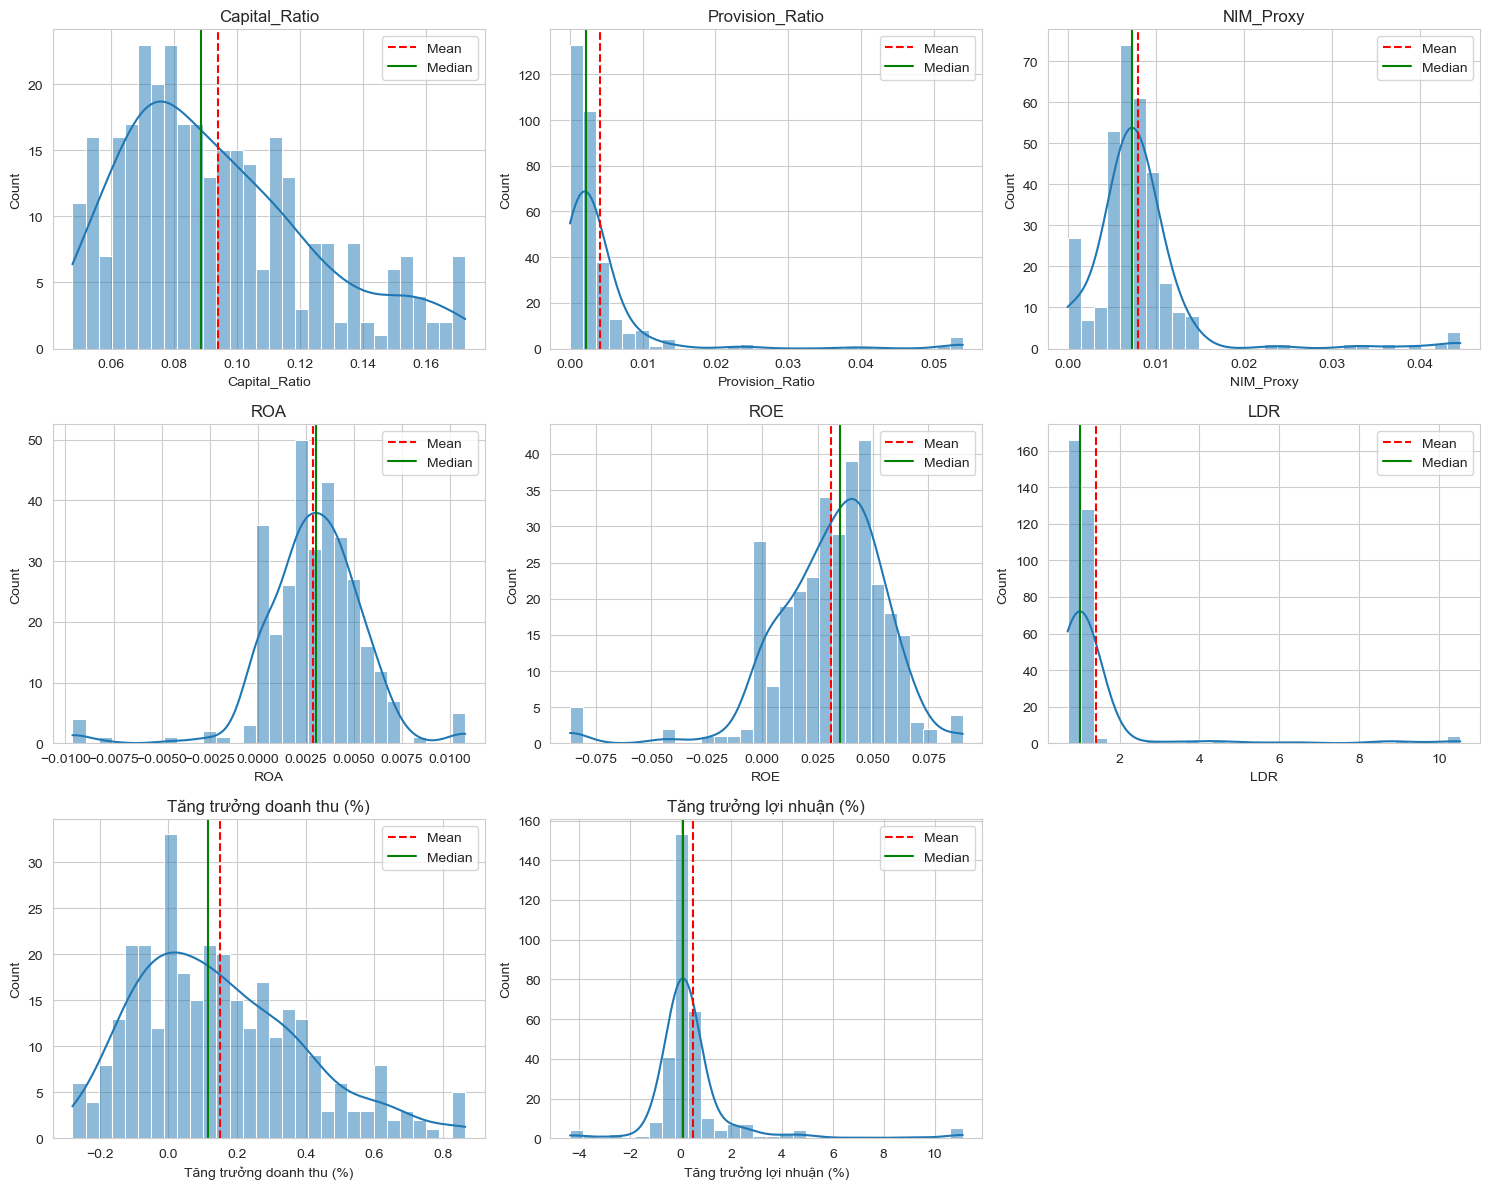


Ma trận tương quan: Nhóm Tài chính


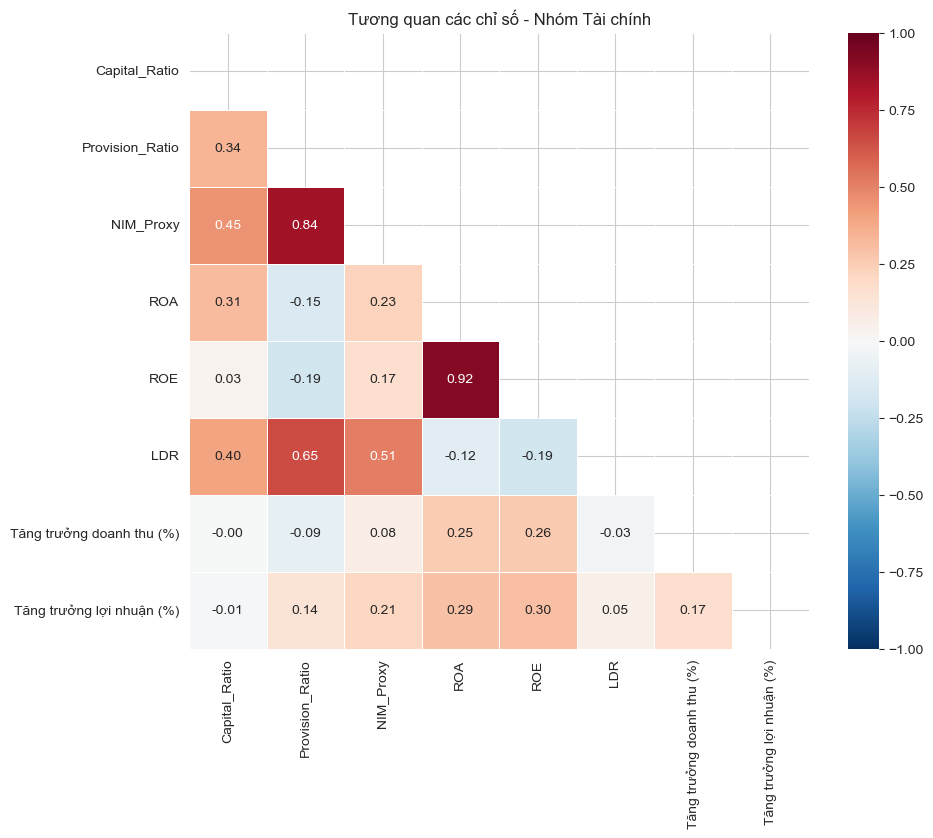


Phân phối dữ liệu: Nhóm Phi Tài chính


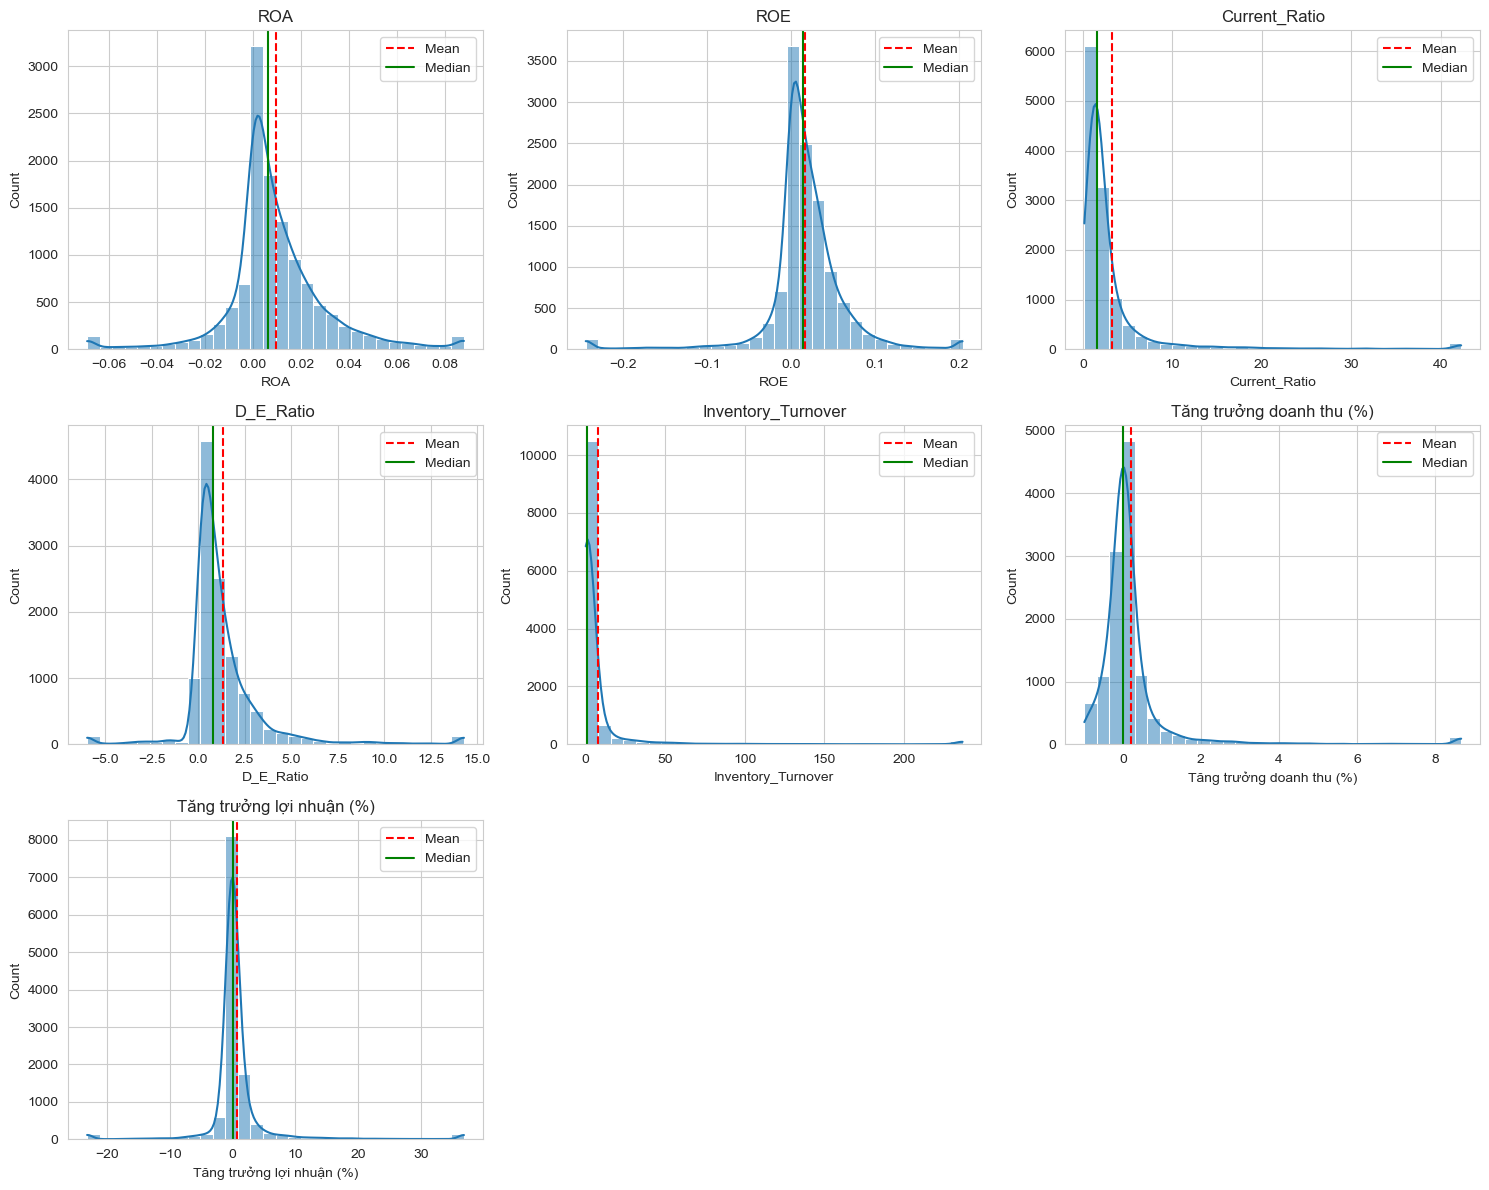


Ma trận tương quan: Nhóm Phi Tài chính


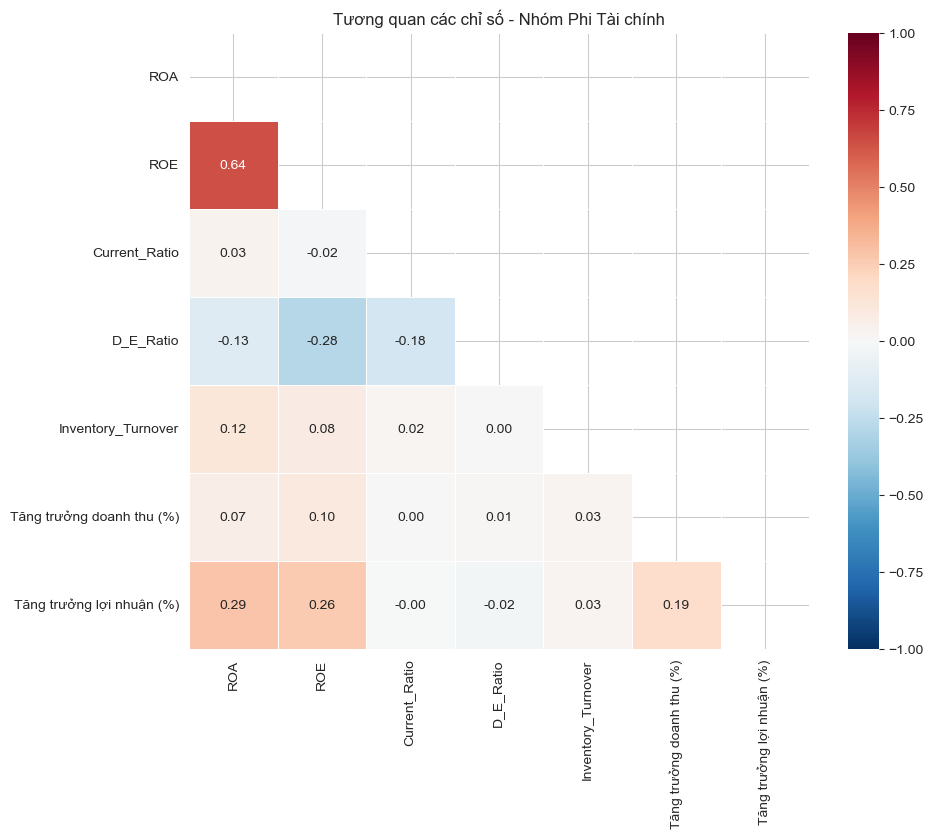

In [11]:
def visualize_data(df, features, group_name):
    valid_cols = [c for c in features if c in df.columns]
    
    # Biểu đồ phân phối
    print(f"\nPhân phối dữ liệu: {group_name}")
    cols = 3
    rows = math.ceil(len(valid_cols) / cols)
    fig, axes = plt.subplots(rows, cols, figsize=(15, 4 * rows))
    axes = axes.flatten()
    
    for i, col in enumerate(valid_cols):
        sns.histplot(df[col], kde=True, ax=axes[i], color='#1f77b4', bins=30)
        axes[i].axvline(df[col].mean(), color='red', linestyle='--', label='Mean')
        axes[i].axvline(df[col].median(), color='green', linestyle='-', label='Median')
        axes[i].set_title(col)
        axes[i].legend()
        
    # Xóa subplot thừa
    for i in range(len(valid_cols), len(axes)):
        fig.delaxes(axes[i])
    plt.tight_layout()
    plt.show()

    # Ma trận tương quan
    print(f"\nMa trận tương quan: {group_name}")
    plt.figure(figsize=(10, 8))
    corr = df[valid_cols].corr()
    mask = np.triu(np.ones_like(corr, dtype=bool)) # Che nửa trên
    
    sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='RdBu_r', 
                vmin=-1, vmax=1, linewidths=0.5)
    plt.title(f'Tương quan các chỉ số - {group_name}')
    plt.show()

# Nhóm Tài chính
visualize_data(df_financial_cleaned, fin_features, "Nhóm Tài chính")

# Nhóm Phi Tài chính
visualize_data(df_non_financial_cleaned, non_fin_features, "Nhóm Phi Tài chính")


## 3. Kiểm tra Đa cộng tuyến (VIF)

In [12]:
def calculate_vif(df, features):
    
    valid_features = [col for col in features if col in df.columns]
    X = df[valid_features].copy()
    X = add_constant(X)
    
    # Tính VIF
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    try:
        vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    except Exception as e:
        print(f"Lỗi tính toán VIF: {e}")
        return None

    vif_data = vif_data[vif_data["Feature"] != 'const'].sort_values("VIF", ascending=False)
    
    display(vif_data)
    return vif_data

# Nhóm Tài chính
print("Nhóm Tài chính")
fin_features = [
    'Capital_Ratio', 'Provision_Ratio', 'NIM_Proxy', 'ROA', 'ROE', 'LDR',
    'Tăng trưởng doanh thu (%)', 'Tăng trưởng lợi nhuận (%)'
]

vif_fin = calculate_vif(df_financial_cleaned, fin_features)

# Nhóm Phi Tài chính
print("\nNhóm Phi Tài chính")
non_fin_features = [
    'ROA', 'ROE', 'Current_Ratio', 'D_E_Ratio', 'Inventory_Turnover',
    'Tăng trưởng doanh thu (%)', 'Tăng trưởng lợi nhuận (%)'
]

vif_non_fin = calculate_vif(df_non_financial_cleaned, non_fin_features)


Nhóm Tài chính


,Feature,VIF
4,ROA,15.0338
5,ROE,12.9713
2,Provision_Ratio,7.3445
3,NIM_Proxy,6.5318
1,Capital_Ratio,2.9260
6,LDR,1.9386
8,Tăng trưởng lợi nhuận (%),1.2031
7,Tăng trưởng doanh thu (%),1.1321



Nhóm Phi Tài chính


,Feature,VIF
2,ROE,1.8900
1,ROA,1.7820
4,D_E_Ratio,1.1434
7,Tăng trưởng lợi nhuận (%),1.1351
3,Current_Ratio,1.0464
6,Tăng trưởng doanh thu (%),1.0405
5,Inventory_Turnover,1.0163


## 4. Phân tích kết quả 

### 4.1 Nhóm Tài chính


#### a) Đặc điểm phân phối của các chỉ số tài chính

**Capital_Ratio**
Biến có phân phối tương đối cân đối, độ lệch phải thấp (skew = 0.76) và giá trị trung bình gần với trung vị. Điều này cho thấy dữ liệu ổn định, ít bị ảnh hưởng bởi các quan sát cực trị.

**Provision_Ratio**
Phân phối lệch phải rất mạnh (skew = 4.99) với kurtosis cao (26.51), thể hiện sự tập trung lớn quanh giá trị thấp và xuất hiện vài giá trị ngoại lệ lớn. Đây là biến có đuôi phải dài và cần được xem xét biến đổi hoặc chuẩn hóa trước khi đưa vào mô hình.

**NIM_Proxy**
Biến cũng có phân phối lệch phải đáng kể (skew = 3.64). Cấu trúc phân phối gợi ý đặc điểm giống log-normal, thể hiện sự khác biệt đáng kể giữa nhóm ngân hàng có biên lãi ròng thấp và nhóm ngân hàng có NIM vượt trội.

**ROA và ROE**
Cả hai biến đều có phân phối lệch trái (skew âm) và độ nhọn cao (kurtosis > 5). Điều này phản ánh phần lớn ngân hàng có tỷ suất sinh lời thấp, trong khi một số ít có kết quả tốt hơn hẳn, tạo ra đuôi phân phối về phía giá trị dương. Sự hiện diện của giá trị âm trong ROA/ROE cũng thể hiện những giai đoạn hoạt động kém hiệu quả.

**LDR (Loan-to-Deposit Ratio)**
Biến có độ lệch phải rất lớn (skew = 4.38) và phân phối đuôi dài. Một số ngân hàng có mức LDR rất cao (lên tới trên 10), cho thấy sự khác biệt đáng kể về khẩu vị rủi ro và chiến lược tăng trưởng tín dụng.

**Tăng trưởng doanh thu (%) và Tăng trưởng lợi nhuận (%)**
Hai biến tăng trưởng thể hiện mức độ biến động lớn:
– Tăng trưởng doanh thu chỉ lệch phải nhẹ.
– Tăng trưởng lợi nhuận biến động mạnh hơn nhiều (skew = 3.44), có giá trị cực đại rất lớn và một số quan sát âm sâu, phản ánh tính chu kỳ và độ nhiễu cao trong kết quả lợi nhuận của ngành ngân hàng.


#### b) Phân tích tương quan

**Mối tương quan giữa ROA và ROE đạt mức rất cao (0.92)**, cho thấy sự trùng lặp thông tin đáng kể giữa hai biến. Điều này phù hợp với bản chất của ROE vốn được suy ra từ ROA thông qua đòn bẩy tài chính (Equity Multiplier).

**NIM_Proxy và Provision_Ratio có tương quan mạnh (0.84)**. Điều này phản ánh mối quan hệ logic: ngân hàng có NIM cao thường đi kèm hoạt động tín dụng rủi ro hơn, dẫn tới tỷ lệ trích lập dự phòng cao.

**LDR tương quan đáng kể với Provision_Ratio (0.65) và NIM_Proxy (0.51)**. Đây là dấu hiệu rằng mức độ cho vay so với huy động có ảnh hưởng tích cực đến lợi suất tài sản sinh lời, đồng thời làm gia tăng rủi ro tín dụng.

Hai biến tăng trưởng doanh thu và lợi nhuận nhìn chung có tương quan yếu với các chỉ số tài chính khác, phù hợp với đặc điểm dễ biến động và mang tính chu kỳ theo thời điểm.


#### c) Đa cộng tuyến (VIF)

Kết quả VIF cho thấy:

* **ROA (VIF = 15.03) và ROE (VIF = 12.97)** có mức đa cộng tuyến rất cao, xác nhận hai biến chứa thông tin trùng lặp. Trong mô hình dự báo, chỉ nên giữ một trong hai biến.
* **Provision_Ratio (VIF = 7.34) và NIM_Proxy (VIF = 6.53)** có VIF khá cao do liên hệ mạnh với nhau và với LDR. Cần cân nhắc khi đưa đồng thời các biến này vào mô hình.
* **Capital_Ratio, LDR và các biến tăng trưởng** đều có VIF thấp, phù hợp để giữ lại mà không gây vấn đề đa cộng tuyến.


#### d) Kết luận tổng quan

1. Nhiều biến tài chính có phân phối lệch phải hoặc lệch trái mạnh, đuôi dài, và tồn tại outlier; điều này có thể ảnh hưởng đến hiệu suất của các mô hình thống kê tuyến tính nếu không được xử lý thích hợp.

2. ROA và ROE có tương quan gần như hoàn toàn, gây ra đa cộng tuyến cao; do đó cần loại bỏ một biến.

3. Provision_Ratio, NIM_Proxy và LDR có mối quan hệ chặt chẽ, phản ánh đặc trưng hoạt động tín dụng và rủi ro của ngân hàng.

4. Các biến tăng trưởng doanh thu/lợi nhuận biến động lớn và ít liên quan đến các tỷ lệ tài chính cơ bản, phù hợp vai trò là biến phản ánh diễn biến ngắn hạn.


### 4.2 Nhóm Phi Tài chính

#### a) Đặc điểm phân phối của các chỉ số chính

**ROA và ROE**
Hai chỉ số sinh lời đều có phân phối lệch đáng kể, nhưng theo hai hướng khác nhau. ROA lệch phải nhẹ (skew ≈ 0.32) với độ nhọn cao, cho thấy phần lớn doanh nghiệp có ROA thấp nhưng tồn tại một số doanh nghiệp có hiệu suất sinh lợi cao. Ngược lại, ROE có skew âm mạnh (–1.24) và kurtosis cao, phản ánh sự xuất hiện của các giá trị âm lớn, thường gắn với doanh nghiệp thua lỗ hoặc sử dụng đòn bẩy tài chính cao.

**Current_Ratio**
Phân phối lệch phải rất mạnh (skew ≈ 4.83), kèm theo kurtosis cực lớn (26.03). Điều này thể hiện đa số doanh nghiệp có khả năng thanh toán ngắn hạn ở mức vừa phải, trong khi một số ít có lượng tài sản ngắn hạn vượt trội tạo thành các giá trị ngoại lệ rất lớn. Biến có đuôi phải dài và không chuẩn.

**D_E_Ratio (Debt-to-Equity Ratio)**
Biến thể hiện mức độ đòn bẩy tài chính có phân phối lệch phải rõ rệt (skew ≈ 2.53) và kurtosis cao (13.00). Điều này phù hợp với thực tế là phần lớn doanh nghiệp duy trì đòn bẩy ở mức thấp đến trung bình, trong khi một số ít có mức nợ rất cao, tạo ra các điểm cực trị.

**Inventory_Turnover (Vòng quay hàng tồn kho)**
Phân phối biến này rất lệch phải (skew ≈ 6.43) và kurtosis lên tới 44.22. Đặc trưng là phần lớn doanh nghiệp có vòng quay thấp, đồng thời tồn tại một số ngành/đơn vị quay vòng hàng tồn kho rất nhanh, tạo ra các giá trị cực đại cao.

**Tăng trưởng doanh thu (%)**
Biến tăng trưởng doanh thu thể hiện độ biến động rất lớn, với skew ≈ 5.20 và kurtosis hơn 32. Điều này phản ánh phần lớn doanh nghiệp chỉ tăng trưởng nhẹ hoặc không tăng trưởng, trong khi một số ít có mức tăng trưởng đột biến theo chu kỳ ngành hoặc sự kiện đặc biệt.

**Tăng trưởng lợi nhuận (%)**
Phân phối biến này biến động mạnh (skew ≈ 2.66), xuất hiện nhiều giá trị âm sâu và các mức tăng trưởng dương rất lớn, phù hợp với đặc tính nhạy cảm của lợi nhuận với chi phí, chu kỳ ngành, và rủi ro hoạt động.

Tổng thể, hầu hết các biến phi tài chính có phân phối lệch phải mạnh và độ nhọn lớn, thể hiện dữ liệu chứa nhiều ngoại lệ tự nhiên theo đặc trưng của doanh nghiệp ngoài ngành tài chính.

#### b) Phân tích tương quan

Ma trận tương quan cho thấy:

**Mối tương quan giữa ROA và ROE đạt mức 0.64**, thấp hơn đáng kể so với nhóm ngân hàng. Điều này phản ánh sự không đồng nhất về mức đòn bẩy tài chính giữa các doanh nghiệp phi tài chính — cùng một ROA có thể dẫn đến ROE khác nhau tùy vào mức độ nợ.

**D_E_Ratio có tương quan âm nhẹ với ROA (–0.13) và ROE (–0.28).**
Điều này phù hợp với logic: doanh nghiệp dùng đòn bẩy cao thường chịu chi phí tài chính lớn hơn, dẫn đến giảm lợi nhuận trên tài sản và vốn.

**Current_Ratio và Inventory_Turnover có mối liên hệ rất yếu với tất cả các biến còn lại.**
Hai biến này phản ánh đặc điểm hoạt động ngắn hạn và quản lý hàng tồn kho, vốn rất khác nhau giữa các ngành nghề, khiến tương quan thấp là điều tự nhiên.

**Tăng trưởng doanh thu và tăng trưởng lợi nhuận có tương quan thấp với các chỉ số hiệu quả hoạt động.**
Độ biến động của hai biến này mang tính ngắn hạn và thường không gắn chặt với khả năng sinh lời dài hạn của doanh nghiệp.

**Tương quan mạnh nhất trong ma trận ngoài cặp ROA–ROE là mối liên hệ giữa tăng trưởng lợi nhuận và ROA/ROE (0.29 và 0.26)**, nhưng vẫn ở mức yếu đến trung bình.

Nhìn chung, nhóm phi tài chính cho thấy cấu trúc tương quan lỏng lẻo, phản ánh sự đa dạng mô hình kinh doanh và đặc điểm ngành nghề.

#### c) Đa cộng tuyến (VIF)

Kết quả VIF cho nhóm phi tài chính đều thấp:

* ROE: 1.89
* ROA: 1.78
* D_E_Ratio: 1.14
* Tăng trưởng lợi nhuận (%): 1.13
* Current_Ratio: 1.04
* Tăng trưởng doanh thu (%): 1.04
* Inventory_Turnover: 1.01

Không có biến nào vượt ngưỡng 5 hoặc 10, cho thấy **đa cộng tuyến không phải là vấn đề trong nhóm phi tài chính**. Điều này phù hợp với quan sát ma trận tương quan, vốn rất rời rạc.

#### d) Kết luận tổng quan

1. Các biến phi tài chính có phân phối rất lệch, độ nhọn cao và chứa nhiều ngoại lệ tự nhiên—đặc biệt ở các biến như Inventory_Turnover, Current_Ratio và tăng trưởng doanh thu/lợi nhuận.
2. Cấu trúc tương quan lỏng lẻo, không có mối quan hệ tuyến tính mạnh giữa phần lớn các biến. ROA và ROE tương quan vừa phải, trong khi các biến hoạt động (Current_Ratio, Inventory_Turnover) gần như độc lập.
3. VIF thấp trên toàn bộ biến, cho thấy không tồn tại vấn đề đa cộng tuyến đáng kể.
4. Nhóm phi tài chính thể hiện tính phân tán cao và không đi theo một cấu trúc ràng buộc chung như nhóm ngân hàng—phản ánh sự đa dạng ngành nghề và mô hình hoạt động.
